In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python2.7/dist-packages


In [2]:
!pip install librosa

In [3]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [4]:
!apt-get update

Hit:1 http://security.debian.org stretch/updates InRelease
Ign:2 http://cdn-fastly.deb.debian.org/debian stretch InRelease
Hit:3 http://cdn-fastly.deb.debian.org/debian stretch-updates InRelease
Hit:4 http://cdn-fastly.deb.debian.org/debian stretch Release
Reading package lists... Done


In [5]:
!apt-get install -y libav-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libav-tools is already the newest version (7:3.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 294 not upgraded.


In [6]:
!apt-get install -y python-audioread 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-audioread is already the newest version (2.1.4-1).
0 upgraded, 0 newly installed, 0 to remove and 294 not upgraded.


In [7]:
audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your favorite song:
#
# audio_path = '/path/to/your/favorite/song.mp3'

y, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
#y, sr = librosa.load(audio_path)

In [8]:
audio_path

'/usr/local/lib/python2.7/dist-packages/librosa/util/example_data/Kevin_MacLeod_-_Vibe_Ace.ogg'

In [9]:
! ls /usr/local/lib/python2.7/dist-packages/librosa/util/example_data/

Kevin_MacLeod_-_Vibe_Ace.ogg


In [10]:
y, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
y

array([ 0.40087634, -0.00176417, -0.0475636 , ..., -0.16671415,
        0.14712895,  0.03928788], dtype=float32)

In [11]:
y, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
y

array([ 0.47819796,  0.27258709,  0.03327722, ..., -0.1720608 ,
        0.15451455,  0.03929744], dtype=float32)

[ 0.43332928  0.05765748 -0.01519269 ..., -0.1754999   0.15763846
  0.03651343]
[ 0.44931716  0.3268266  -0.01399679 ..., -0.17118256  0.15349427
  0.04038849]


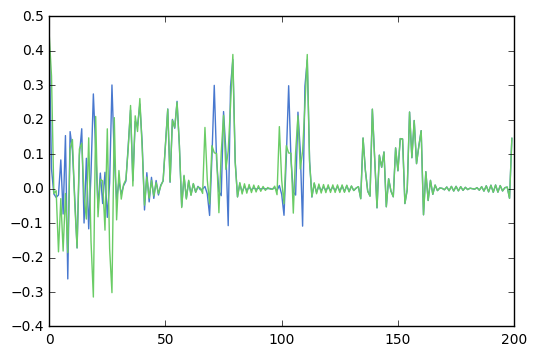

In [12]:
y1, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
print(y1)
y2, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",)
print(y2)
plt.plot(range(0,200),y1[0:200],range(0,200),y2[0:200])

In [13]:
sr

22050

[ 0.22122508  0.03109568  0.1852258  ...,  0.01702831  0.0876413   0.        ]
2312098
[ 0.19672237  0.00440407 -0.08517602 ...,  0.01342012  0.0898454   0.        ]
2312098


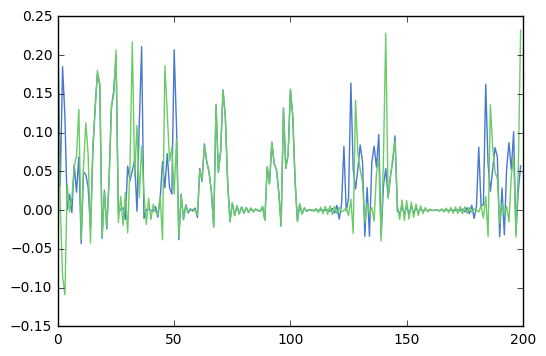

In [14]:
y1, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",sr=10000)
print(y1)
print(len(y1)) 

y2, sr = librosa.load("/srv/Radiohead - In Rainbows (2007) 320kbps/01 15 Step.mp3",sr=10000)
print(y2)
print(len(y2))

plt.plot(range(0,200),y1[0:200],range(0,200),y2[0:200])

In [15]:
sr

10000

(array([  1.86048900e+06,   2.42820000e+05,   1.11811000e+05,
          5.60700000e+04,   2.45340000e+04,   1.15480000e+04,
          3.16000000e+03,   1.26000000e+03,   3.51000000e+02,
          5.50000000e+01]),
 array([ 0.        ,  0.07528467,  0.15056934,  0.22585402,  0.30113869,
         0.37642336,  0.45170803,  0.5269927 ,  0.60227737,  0.67756205,
         0.75284672]),
 <a list of 10 Patch objects>)

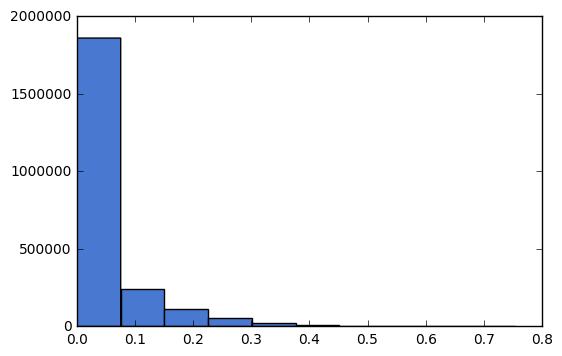

In [16]:
plt.hist(np.abs(y1-y2))

In [17]:
S = librosa.feature.melspectrogram(y1, sr=10000, n_mels=128)


In [18]:
log_S = librosa.logamplitude(S, ref_power=np.max)
log_S

array([[-16.42582392, -18.75831239, -19.6609865 , ..., -18.57109164,
        -18.87155252, -18.13557952],
       [-18.41975082, -18.36329761, -17.94179015, ..., -18.84226811,
        -18.97864122, -19.80980392],
       [-24.90671482, -26.70477481, -28.22406902, ..., -24.59052015,
        -24.90027203, -24.21567704],
       ..., 
       [-33.25484297, -32.26526516, -31.6220493 , ..., -34.33468242,
        -33.6487483 , -31.69794415],
       [-36.53333997, -35.35427726, -34.57100719, ..., -35.51733129,
        -35.01347884, -32.58736312],
       [-49.58310978, -48.33900133, -46.63124661, ..., -46.37129329,
        -46.07032902, -37.23062831]])

In [20]:
!pwd

/srv


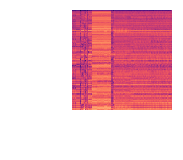

In [34]:
width=224
height=224
fig = plt.figure()
fig.set_size_inches(width/height, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')


plt.savefig("test.png",dpi=height)

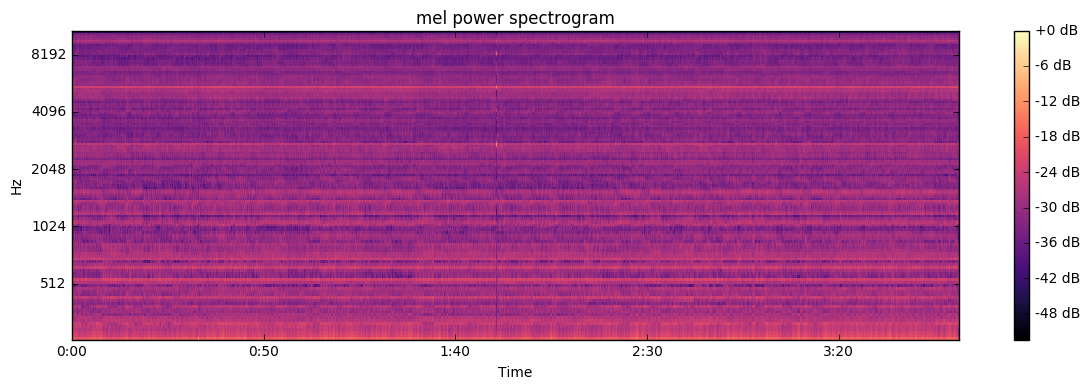

In [10]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
#log_S = librosa.logamplitude(S, ref_power=np.max)
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [11]:
S

array([[  3.17032909e+01,   2.71663206e+01,   1.69972931e+01, ...,
          5.72036960e+00,   5.57441810e+00,   3.55220612e+00],
       [  1.01457028e+00,   3.92661976e+00,   3.80202705e+00, ...,
          1.89106983e+00,   1.43615372e+00,   6.56402258e-01],
       [  3.43285805e-01,   1.04422413e+00,   1.73547901e+00, ...,
          1.48949105e+00,   1.19773931e+00,   4.49778308e-01],
       ..., 
       [  3.66292784e-02,   1.71340101e-01,   2.25491139e-01, ...,
          3.76258332e-01,   3.71456096e-01,   2.76434013e-01],
       [  2.91814012e-02,   1.83803258e-01,   2.20391936e-01, ...,
          1.75478752e-01,   1.61085166e-01,   2.58553533e-01],
       [  4.34796482e-03,   6.16634955e-03,   5.18020491e-03, ...,
          1.59806070e-02,   2.68582118e-02,   2.24428703e-01]])

In [12]:
log_S

array([[-11.90418937, -12.5749246 , -14.61143519, ..., -19.34099192,
        -19.45323743, -21.41025125],
       [-26.85241146, -20.97504435, -21.1150808 , ..., -24.14815716,
        -25.34322355, -28.74353216],
       [-31.55867437, -26.72729557, -24.52103917, ..., -25.18485385,
        -26.13160977, -30.38524776],
       ..., 
       [-41.27694919, -34.57664264, -33.38393802, ..., -31.16037157,
        -31.21615793, -32.49931805],
       [-42.26417141, -34.27170078, -33.48327583, ..., -34.47298744,
        -34.84467734, -32.78972805],
       [-50.53237261, -49.01495143, -49.77176344, ..., -44.87930012,
        -42.62446189, -33.40444882]])

In [11]:
y_harmonic, y_percussive = librosa.effects.hpss(y)


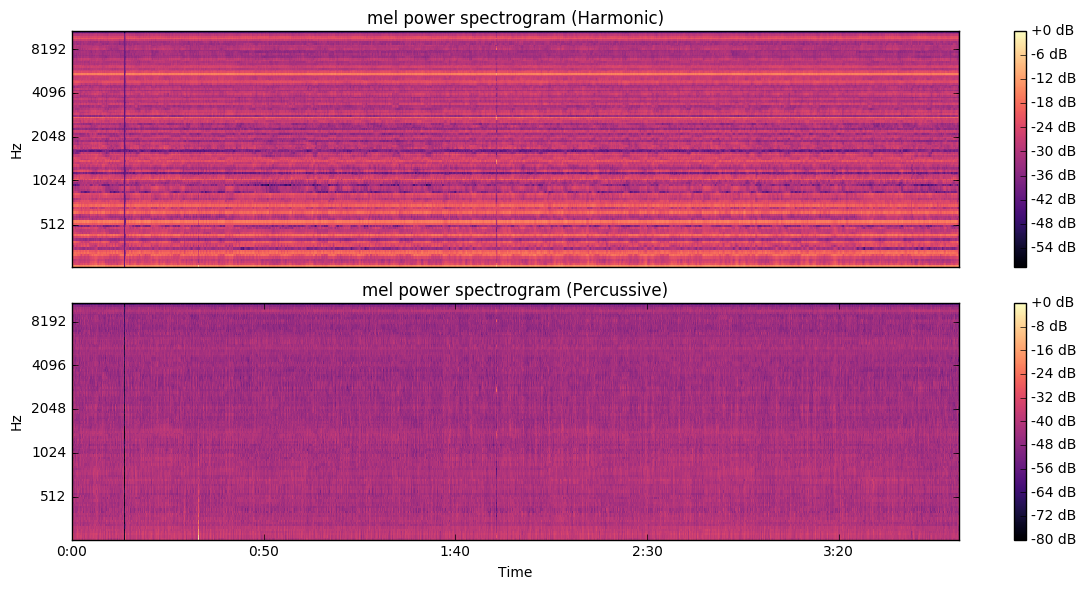

In [12]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

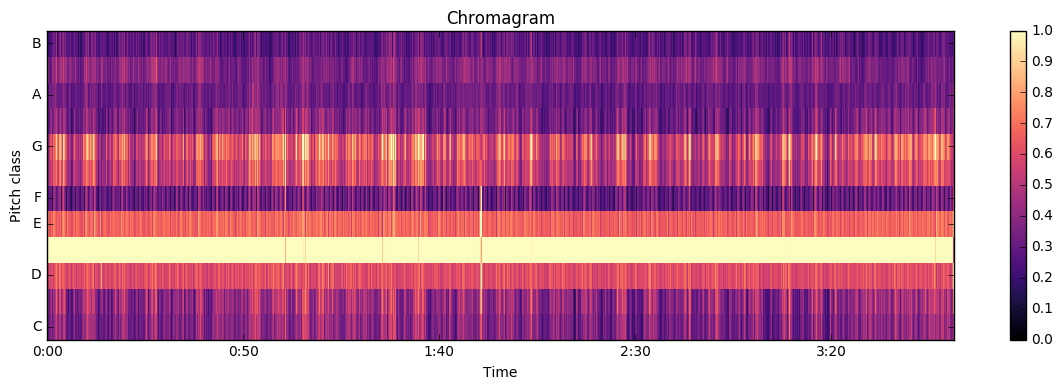

In [13]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

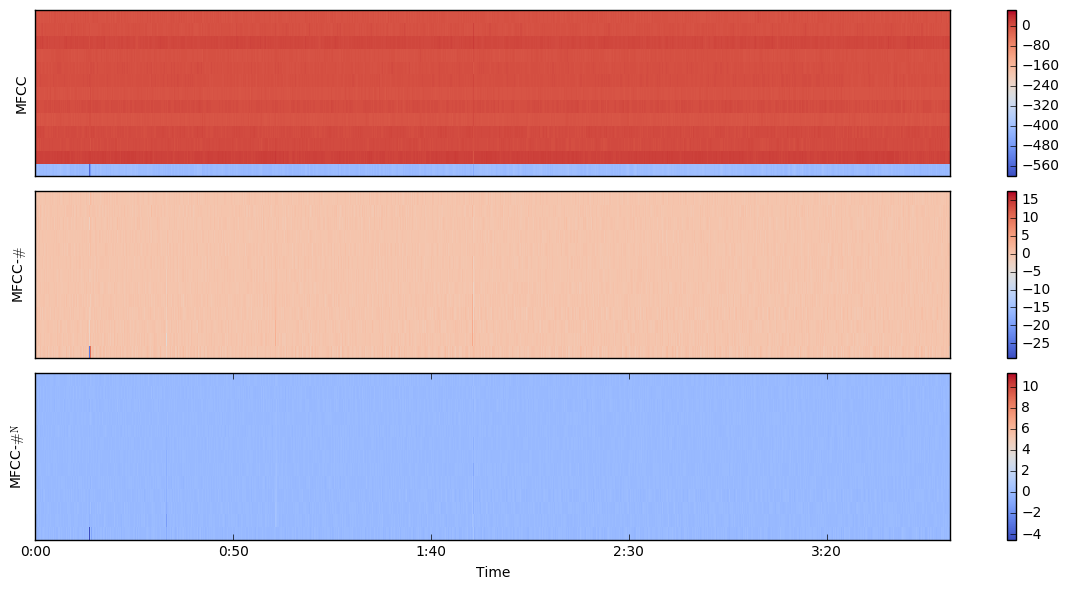

In [14]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

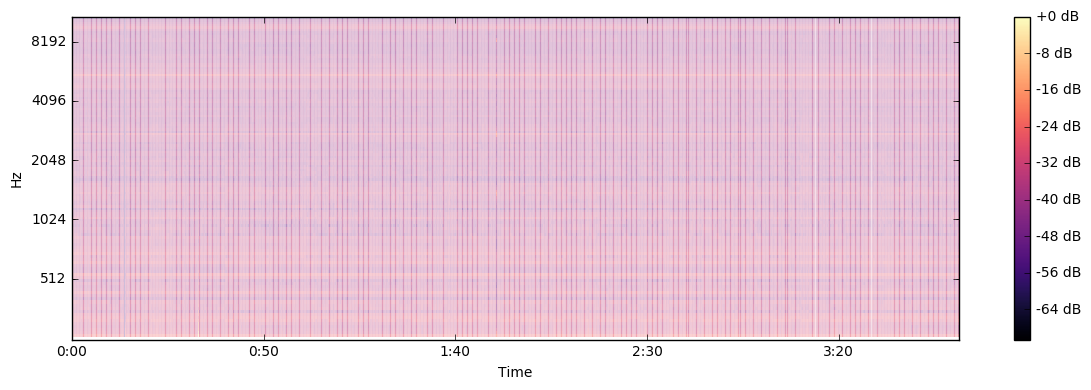

In [15]:
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [16]:
print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

# We could also get frame numbers from times by librosa.time_to_frames()

Estimated tempo:        143.55 BPM
('First 5 beat frames:   ', array([ 3, 20, 38, 56, 73]))
('First 5 beat times:    ', array([ 0.06965986,  0.46439909,  0.88235828,  1.30031746,  1.69505669]))


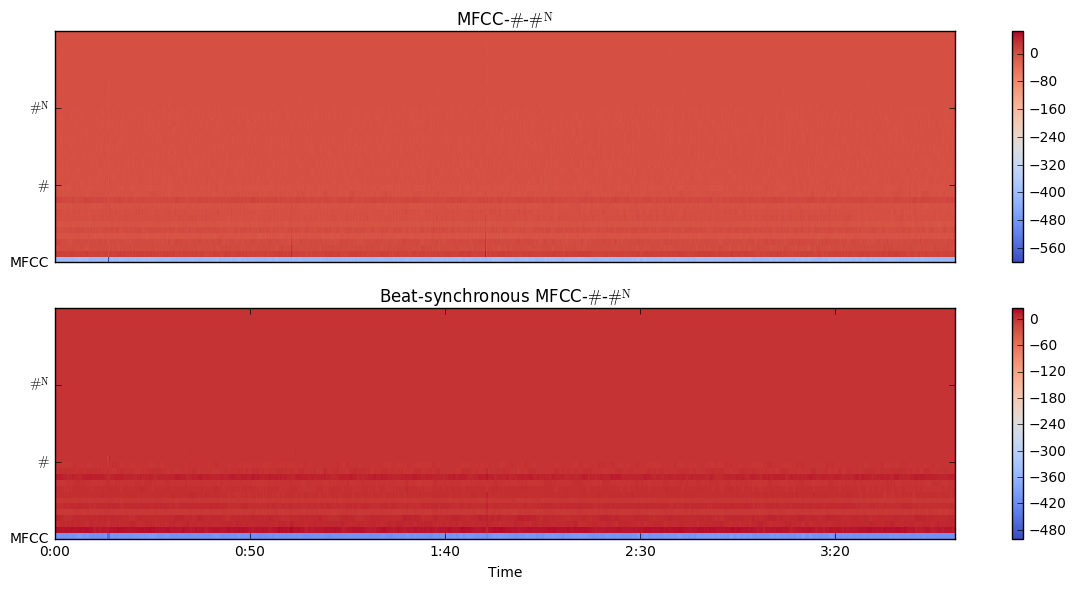

In [17]:
# feature.sync will summarize each beat event by the mean feature vector within that beat

M_sync = librosa.util.sync(M, beats)

plt.figure(figsize=(12,6))

# Let's plot the original and beat-synchronous features against each other
plt.subplot(2,1,1)
librosa.display.specshow(M)
plt.title('MFCC-$\Delta$-$\Delta^2$')

# We can also use pyplot *ticks directly
# Let's mark off the raw MFCC and the delta features
plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])

plt.colorbar()

plt.subplot(2,1,2)
# librosa can generate axis ticks from arbitrary timestamps and beat events also
librosa.display.specshow(M_sync, x_axis='time',
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))

plt.yticks(np.arange(0, M_sync.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])             
plt.title('Beat-synchronous MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

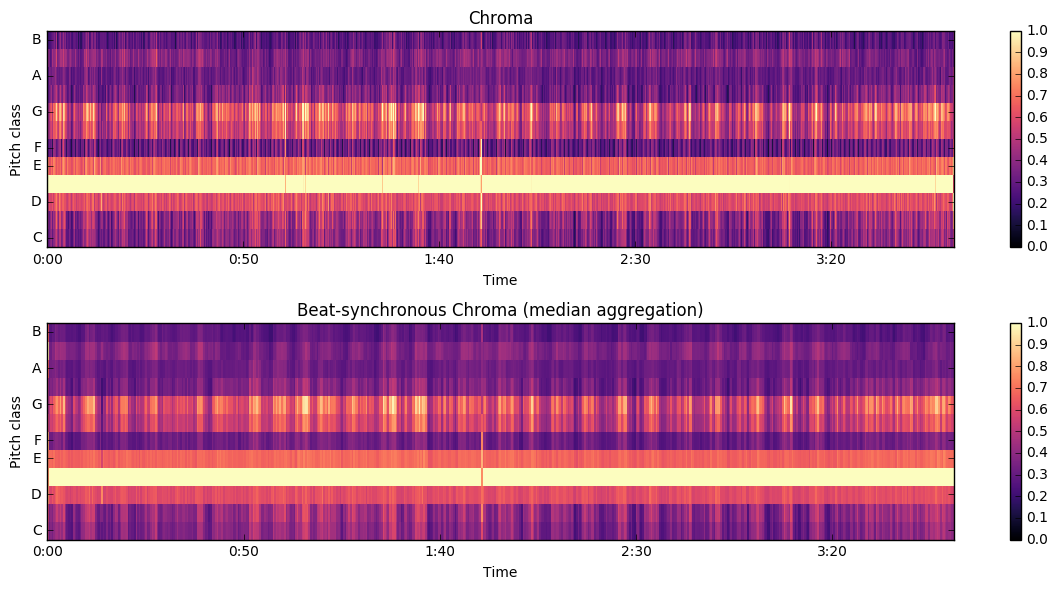

In [18]:
# Beat synchronization is flexible.
# Instead of computing the mean delta-MFCC within each beat, let's do beat-synchronous chroma
# We can replace the mean with any statistical aggregation function, such as min, max, or median.

C_sync = librosa.util.sync(C, beats, aggregate=np.median)

plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Chroma')
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', 
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))


plt.title('Beat-synchronous Chroma (median aggregation)')

plt.colorbar()
plt.tight_layout()